In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

In [2]:
df_res = pd.read_csv('../data/results/stopping_results_summary_table.csv', index_col=0)

function to generate this data:

``results = []

for (hash_ranker, hash_method, repeat), sub_df in tqdm(df.groupby(['sim_key', 'method-hash', 'sim-rep'])):
    simulation = sub_df.sort_values(by=['batch_i'])
    simulation = simulation.where(simulation['dataset'].notna())
    rel_curve = simulation['n_incl_seen'] / simulation['n_incl']
    
    #info = simulation.iloc[0]
    #logger.info(f'Dataset "{info['dataset']}" stopped by "{info['method']}" (repeat {repeat} via {hash_method} / {hash_ranker})')
    stop_rows = simulation[simulation['safe_to_stop']]
    # first batch when it is safe to stop (according to the stopping method) or last batch of the simulation (stopping not triggered)
    stop_row = (stop_rows.iloc[0] if  len(stop_rows) > 0 else simulation.iloc[-1]).to_dict()

    for t in [0.8, 0.85, 0.9, 0.95, 0.99, 1.0]:
        # in which step is the target recall reached?
        step = np.argwhere(rel_curve >= t).min()
        stop_row[f'seen@recall={t}'] = simulation.iloc[step]['n_seen']
        stop_row[f'unseen@recall={t}'] = simulation.iloc[step]['n_unseen']
        stop_row[f'seen_incl@recall={t}'] = simulation.iloc[step]['n_incl_seen']
        
        stop_row[f'too_late@recall={t}'] = max(0, stop_row['n_seen'] - simulation.iloc[step]['n_seen'])
        stop_row[f'too_late_left%@recall={t}'] = max(0, stop_row['n_seen'] - simulation.iloc[step]['n_seen']) / (simulation.iloc[step]['n_seen'])
        stop_row[f'too_late_right%@recall={t}'] = max(0, stop_row['n_seen'] - simulation.iloc[step]['n_seen']) / (stop_row['n_total'] - simulation.iloc[step]['n_seen'])
        
        stop_row[f'too_early@recall={t}'] = max(0, simulation.iloc[step]['n_seen'] - stop_row['n_seen'])
        stop_row[f'too_early%@recall={t}'] = -max(0, simulation.iloc[step]['n_seen'] - stop_row['n_seen']) / (simulation.iloc[step]['n_seen'])

        stop_row[f'missed@recall={t}'] =  max(0, simulation.iloc[step]['n_incl_seen'] - stop_row['n_incl_seen'])
        stop_row[f'missed%@recall={t}'] =  -max(0, simulation.iloc[step]['n_incl_seen'] - stop_row['n_incl_seen']) / stop_row['n_incl']

    results.append(stop_row)

df_res = pd.DataFrame(results)
df_res['stop_recall'] = df_res['n_incl_seen'] / df_res['n_incl']
df_res['work_saved'] = df_res['n_unseen'] / df_res['n_total']
df_res['incl_missed'] = (df_res['n_incl'] - df_res['n_incl_seen']) / df_res['n_incl']
```

df_res.to_csv('../data/results/stopping_results_summary_table.csv')

In [3]:
df_res

,dataset,sim-rep,sim_key,batch_i,n_total,n_seen,n_unseen,n_incl,n_incl_seen,n_incl_batch,...,tetl_left@recall=0.99,tetl_right@recall=0.99,mtl_right@recall=0.99,mtl_left@recall=0.99,missed_%@recall=0.99,tetl_left@recall=1.0,tetl_right@recall=1.0,mtl_right@recall=1.0,mtl_left@recall=1.0,missed_%@recall=1.0
0,clef-CD005139,1,clef-CD005139-0-500-1-best,304,4564,4564,0,105,105,0,...,77.933723,100.000000,100.000000,77.933723,-0.000000,31.717172,100.000000,100.000000,31.717172,-0.000000
1,clef-CD005139,1,clef-CD005139-0-500-1-best,304,4564,4564,0,105,105,0,...,77.933723,100.000000,100.000000,77.933723,-0.000000,31.717172,100.000000,100.000000,31.717172,-0.000000
2,clef-CD005139,1,clef-CD005139-0-500-1-best,304,4564,4564,0,105,105,0,...,77.933723,100.000000,100.000000,77.933723,-0.000000,31.717172,100.000000,100.000000,31.717172,-0.000000
3,clef-CD005139,1,clef-CD005139-0-500-1-best,304,4564,4564,0,105,105,0,...,77.933723,100.000000,100.000000,77.933723,-0.000000,31.717172,100.000000,100.000000,31.717172,-0.000000
4,clef-CD005139,1,clef-CD005139-0-500-1-best,304,4564,4564,0,105,105,0,...,77.933723,100.000000,100.000000,77.933723,-0.000000,31.717172,100.000000,100.000000,31.717172,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,generic-paired-ris-shareddecisionmaking1.3,3,generic-paired-ris-shareddecisionmaking1.3-0-5...,608,9124,9124,0,151,151,0,...,118.800959,100.000000,100.000000,118.800959,-0.000000,107.599545,100.000000,100.000000,107.599545,-0.000000
9821,generic-paired-ris-shareddecisionmaking1.3,3,generic-paired-ris-shareddecisionmaking1.3-0-5...,222,9124,3345,5779,151,149,0,...,-19.784173,-19.784173,-0.662252,-0.662252,0.662252,-23.890785,-23.890785,-1.324503,-1.324503,1.324503
9822,generic-paired-ris-shareddecisionmaking1.3,3,generic-paired-ris-shareddecisionmaking1.3-0-5...,274,9124,4125,4999,151,149,0,...,-1.079137,-1.079137,-0.662252,-0.662252,0.662252,-6.143345,-6.143345,-1.324503,-1.324503,1.324503
9823,generic-paired-ris-shareddecisionmaking1.3,3,generic-paired-ris-shareddecisionmaking1.3-0-5...,608,9124,9124,0,151,151,0,...,118.800959,100.000000,100.000000,118.800959,-0.000000,107.599545,100.000000,100.000000,107.599545,-0.000000


In [4]:
df_res.columns.to_list()

['dataset',
 'sim-rep',
 'sim_key',
 'batch_i',
 'n_total',
 'n_seen',
 'n_unseen',
 'n_incl',
 'n_incl_seen',
 'n_incl_batch',
 'n_records_batch',
 'method',
 'safe_to_stop',
 'method-hash',
 'method-KEY',
 'method-safe_to_stop',
 'method-score',
 'method-recall_target',
 'method-confidence_level',
 'method-n_windows',
 'method-expected_includes',
 'method-curve_estimate',
 'method-inclusion_threshold',
 'method-est_recall',
 'method-batch_size',
 'method-threshold',
 'method-current_precision',
 'method-bias',
 'method-num_to_stop',
 'method-fraction',
 'method-est_incl',
 'method-window_size',
 'method-polyorder',
 'method-threshold_ratio',
 'method-threshold_peak',
 'method-slope_ratio',
 'method-smoothing',
 'method-alpha',
 'method-constant',
 'method-num_reviewed',
 'method-num_relevant_reviewed',
 'method-nstd',
 'method-est_var',
 'seen@recall=0.8',
 'unseen@recall=0.8',
 'seen_incl@recall=0.8',
 'too_late@recall=0.8',
 'too_late_left%@recall=0.8',
 'too_late_right%@recall=0.8

<Axes: >

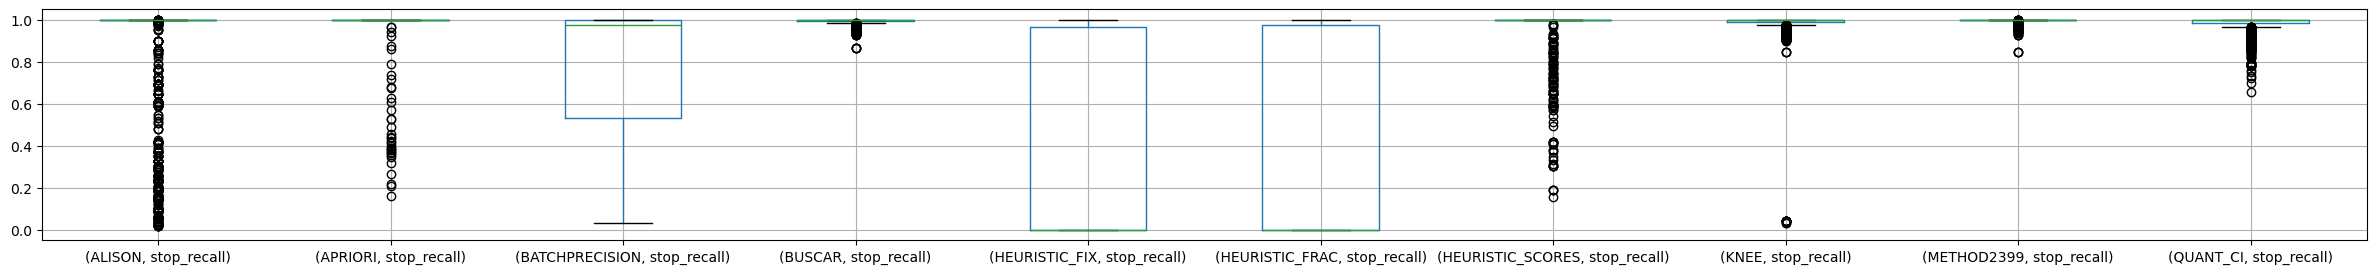

In [5]:
df_res.groupby('method').boxplot(subplots=False, column='stop_recall', figsize=(30, 3))

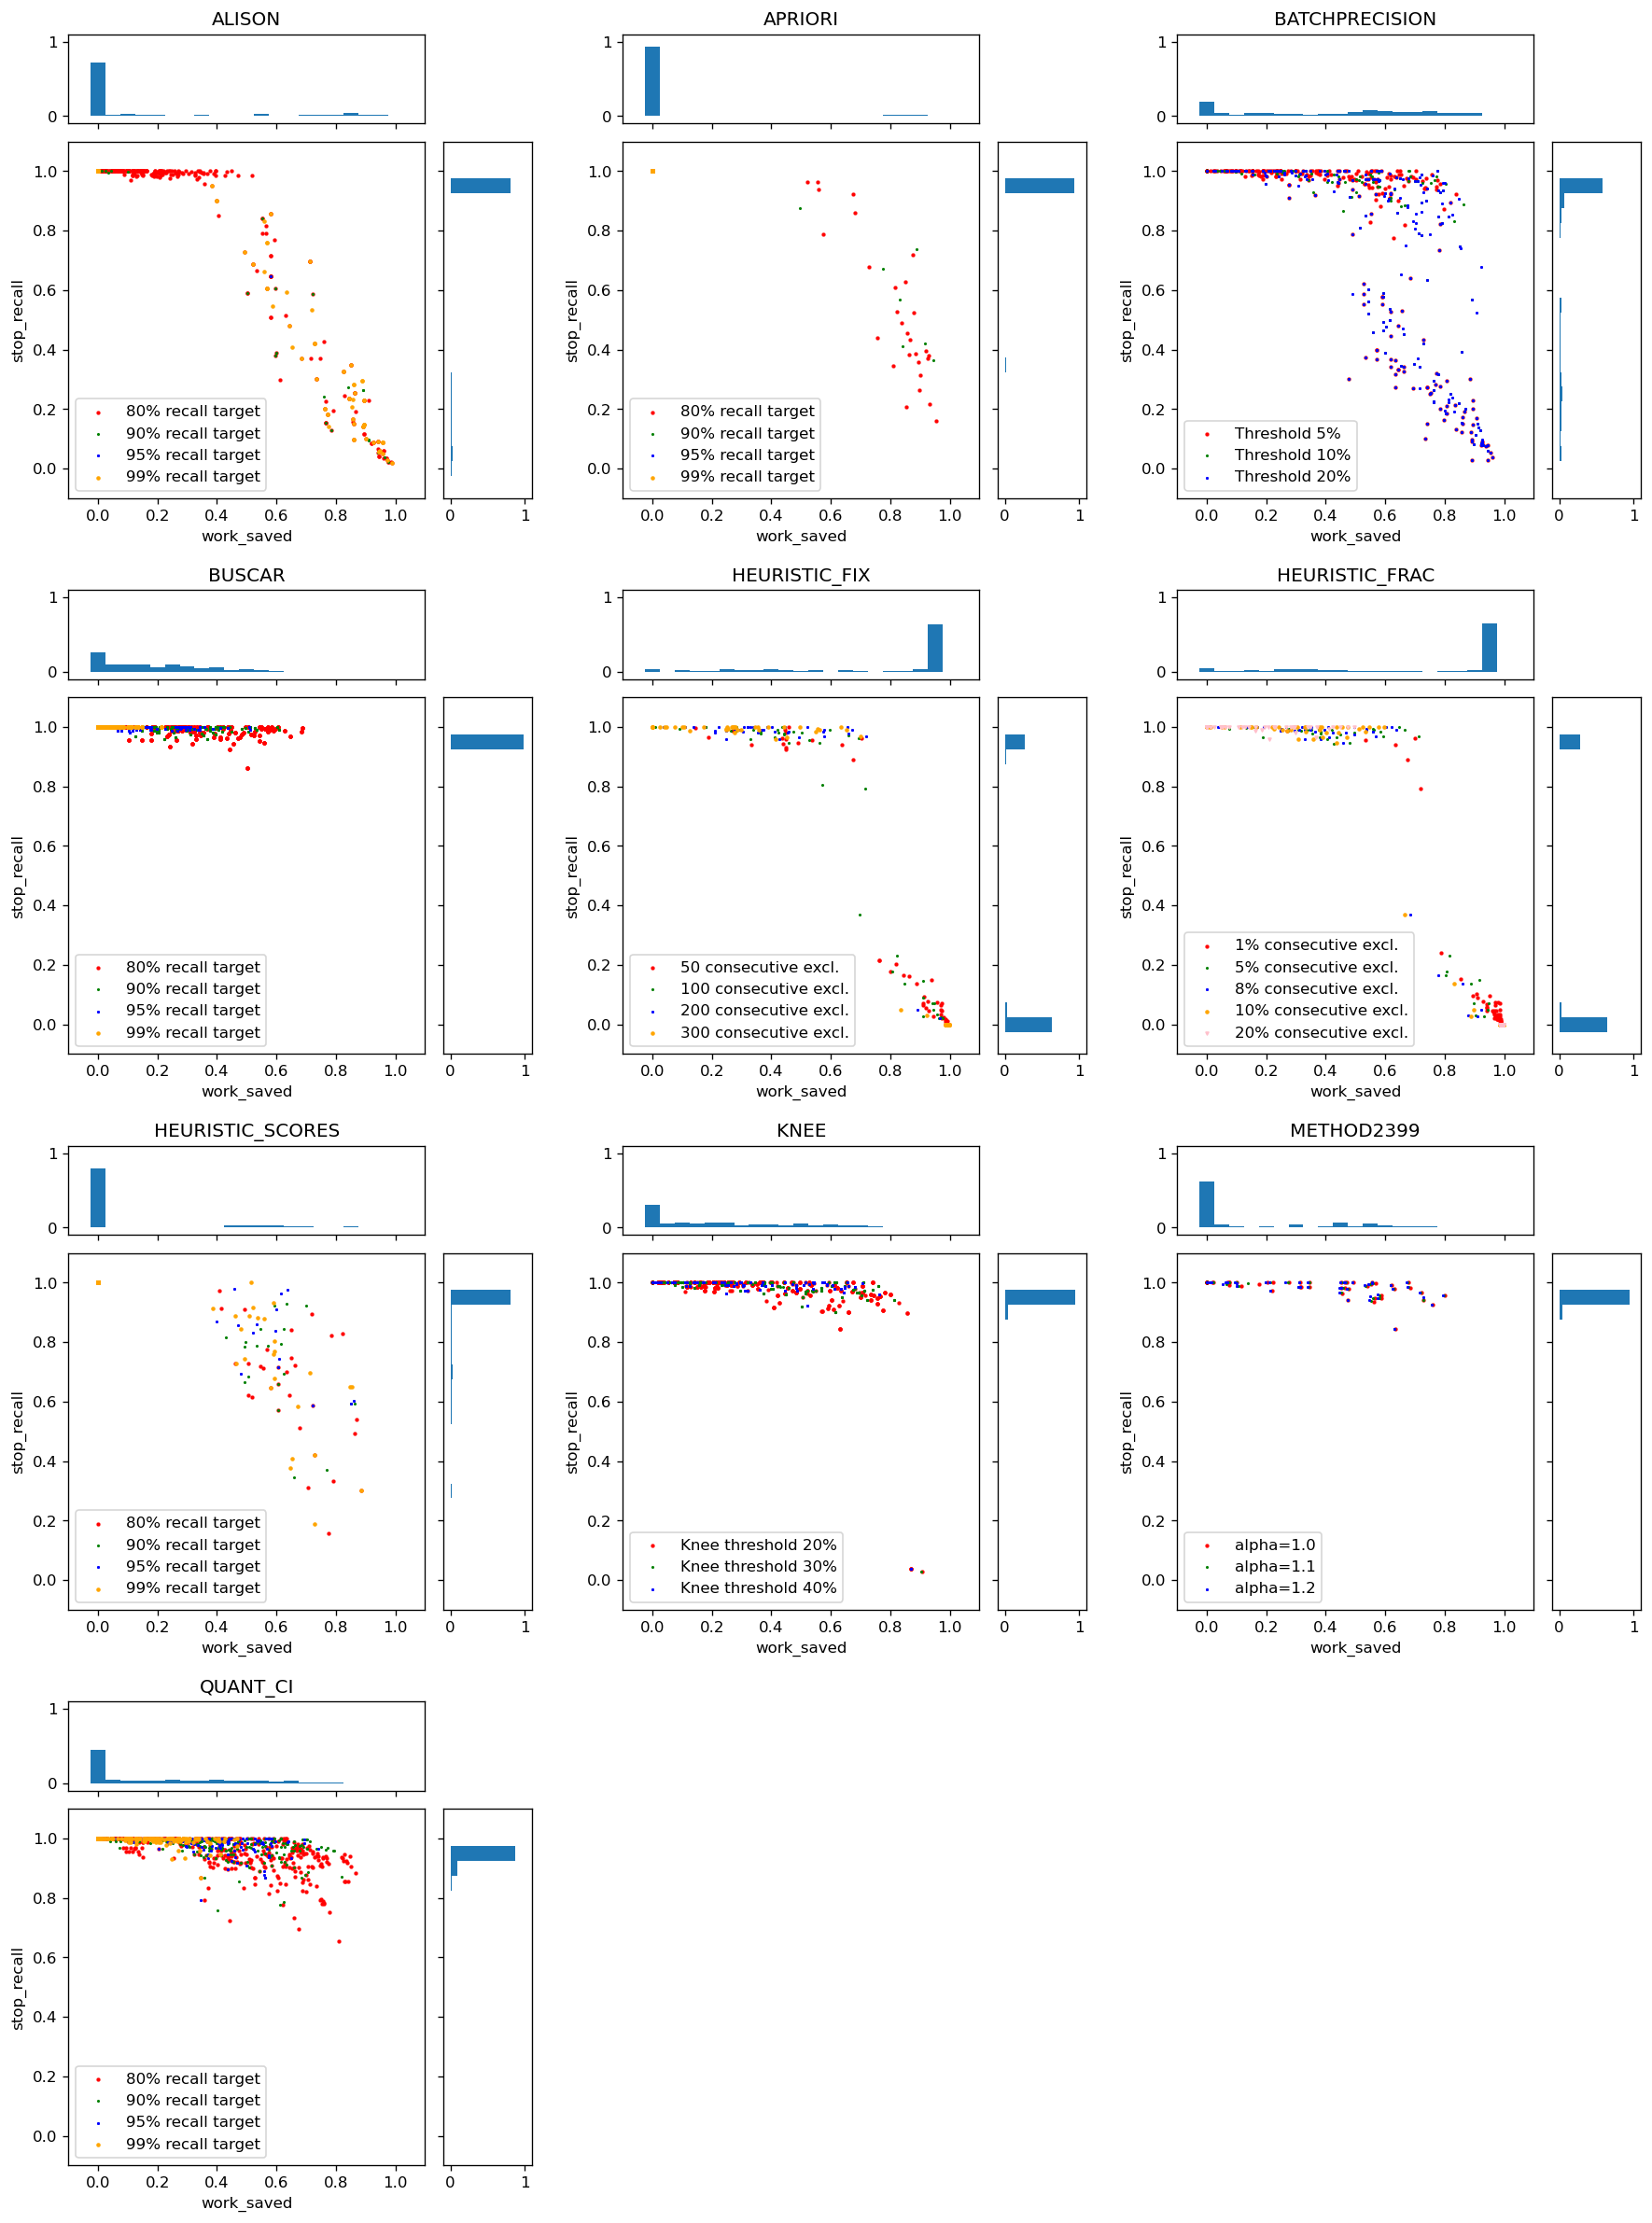

In [6]:
hists_y = {}
hists_x = {}

n_methods = len(df_res['method'].unique())
n_cols = 3
n_rows = (n_methods // n_cols)+1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), dpi=120)

markers = ['x', '.', '+', 'o', 'v', '2', 'D', 's']
colours = ['red', 'green', 'blue', 'orange', 'pink']

xval = 'work_saved'
xlab = 'Work saved'
for mi, meth in enumerate(sorted(df_res['method'].unique())):
    ax = axes[int(mi/n_cols)][mi%n_cols]
    mask = df_res['method'] == meth
    df_meth = df_res[mask]
    
    ax.set_aspect('equal')
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25])
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1])


    ax.set_title(meth)
    ax.set_ylabel('Recall when stopped')
    ax.set_xlabel(xlab)
    ax.grid(lw=0.2, ls='--')
    
    bins = 20
    binwidth = 1 / bins
    bins = np.arange(0, 1 + binwidth, binwidth)
    
    recall_targets = sorted(df_meth['method-recall_target'].unique())
    if len(recall_targets) > 1:
        for rti, rt in enumerate(recall_targets):
            df_meth[df_meth['method-recall_target'] == rt].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[rti], marker=markers[rti], label=f'{rt:.0%} recall target')
        ax.legend()
    elif meth == 'BATCHPRECISION':
        thresholds = sorted(df_meth['method-threshold'].unique())
        for thi, th in enumerate(thresholds):
            df_meth[df_meth['method-threshold'] == th].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[thi], marker=markers[thi], label=f'Threshold {th:.0%}')
        ax.legend()
    elif meth == 'HEURISTIC_FIX':
        values = sorted(df_meth['method-num_to_stop'].unique())
        for vi, v in enumerate(values):
            df_meth[df_meth['method-num_to_stop'] == v].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[vi], marker=markers[vi], label=f'{v:,.0f} consecutive excl.')
    elif meth == 'HEURISTIC_FRAC':
        values = sorted(df_meth['method-fraction'].unique())
        for vi, v in enumerate(values):
            df_meth[df_meth['method-fraction'] == v].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[vi], marker=markers[vi], label=f'{v:.0%} consecutive excl.')
        ax.legend()
    elif meth == 'KNEE':
        values = sorted(df_meth['method-threshold_peak'].unique())
        for vi, v in enumerate(values):
            df_meth[df_meth['method-threshold_peak'] == v].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[vi], marker=markers[vi], label=f'Knee threshold {v:.0%}')
        ax.legend()
    elif meth == 'METHOD2399':
        values = sorted(df_meth['method-alpha'].unique())
        for vi, v in enumerate(values):
            df_meth[df_meth['method-alpha'] == v].plot.scatter(x=xval, y='stop_recall', ax=ax, s=3, c=colours[vi], marker=markers[vi], label=f'alpha={v:.1f}')
        ax.legend()
    else:
        df_meth.plot.scatter(x=xval, y='stop_recall', ax=ax, s=1)

    histx, _ = np.histogram(df_meth[xval], bins=bins)
    histy, _ = np.histogram(df_meth['stop_recall'], bins=bins)
    ax_histx.bar(bins[:-1], height=histx / histx.sum(), width=binwidth)
    ax_histy.barh(y=bins[:-1], width=histy / histy.sum(), height=binwidth)
    
    hists_x[meth] = histx
    hists_y[meth] = histy

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax.axes.xaxis.set_visible(True)
    ax.axes.yaxis.set_visible(True)

    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)
    ax_histx.set_xlim(-0.1, 1.1)
    ax_histx.set_ylim(-0.1, 1.1)
    ax_histy.set_xlim(-0.1, 1.1)
    ax_histy.set_ylim(-0.1, 1.1)

fig.delaxes(axes[3][2])
fig.delaxes(axes[3][1])
    
fig.tight_layout()
#fig.savefig('../data/plots/scatter2.png')

In [7]:
#from IPython.display import Image
#Image(filename='../data/plots/scatter2.png')

## Check some properties and consistency of the data

In [8]:
df_res['method'].value_counts()

method
BUSCAR              1744
ALISON              1744
QUANT_CI            1644
KNEE                1308
BATCHPRECISION       981
APRIORI              548
HEURISTIC_SCORES     548
HEURISTIC_FRAC       545
HEURISTIC_FIX        436
METHOD2399           327
Name: count, dtype: int64

In [9]:
# everything was computed using batch size 15
df_res['n_records_batch'].unique()

array([15])

<Axes: >

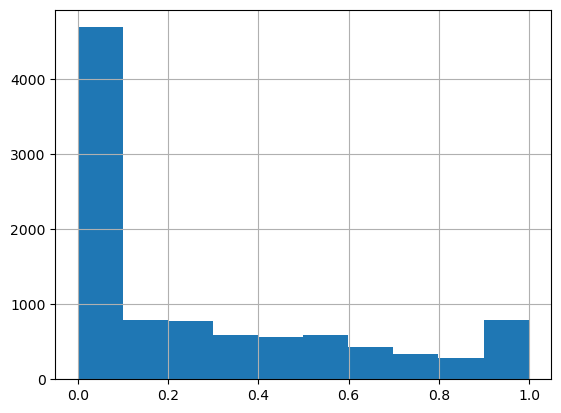

In [10]:
df_res['work_saved'].hist()

<Axes: >

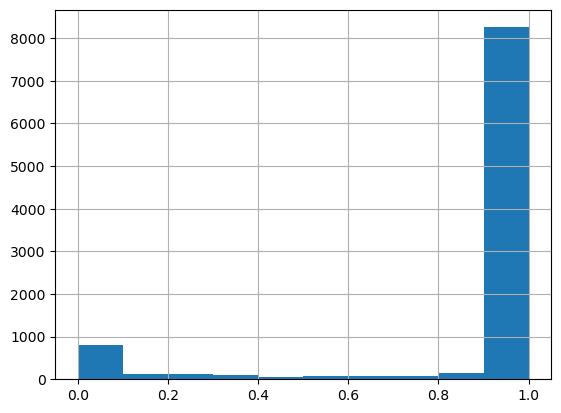

In [11]:
# incl_missed = 1 - recall_at_stop
#df_res['incl_missed'].hist()
df_res['stop_recall'].hist()

In [12]:
df_res['method-recall_target'].notna().value_counts()

method-recall_target
True     6228
False    3597
Name: count, dtype: int64

In [13]:
df_res['method-recall_target'].notna().groupby(df_res['method']).value_counts().unstack()

method-recall_target,False,True
method,,
ALISON,NaN,1744.0
APRIORI,NaN,548.0
BATCHPRECISION,981.0,NaN
BUSCAR,NaN,1744.0
HEURISTIC_FIX,436.0,NaN
HEURISTIC_FRAC,545.0,NaN
HEURISTIC_SCORES,NaN,548.0
KNEE,1308.0,NaN
METHOD2399,327.0,NaN


In [14]:
# how often is the target recall reached
df_res['target_recall_reached'] = df_res['stop_recall'] >= df_res['method-recall_target']
df_res[df_res['method-recall_target'].notna()].groupby('method')['target_recall_reached'].value_counts(normalize=True).unstack()

target_recall_reached,False,True
method,,
ALISON,0.182339,0.817661
APRIORI,0.054745,0.945255
BUSCAR,NaN,1.000000
HEURISTIC_SCORES,0.175182,0.824818
QUANT_CI,0.038929,0.961071


In [15]:
df_res[df_res['method'] == 'QUANT_CI'].groupby('method-recall_target').agg({'method-hash' : ['count'],
                                                            'target_recall_reached' : ['sum'],
                                                            'stop_recall': ['min', 'median', 'mean'],
                                                            'work_saved': ['min', 'max']})

method-hash target_recall_reached stop_recall            \
                           count                   sum         min    median   
method-recall_target                                                           
0.80                         411                   398    0.655738  0.974359   
0.90                         411                   400    0.758621  1.000000   
0.95                         411                   395    0.793103  1.000000   
0.99                         411                   387    0.866667  1.000000   

                               work_saved            
                          mean        min       max  
method-recall_target                                 
0.80                  0.956221        0.0  0.865688  
0.90                  0.984511        0.0  0.820250  
0.95                  0.993141        0.0  0.741123  
0.99                  0.997999        0.0  0.466795

## Tentative table for the paper

<Axes: >

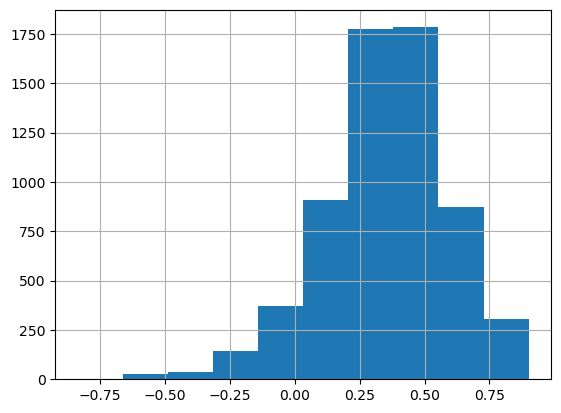

In [16]:
RECALL_TARGETS = [0.8, 0.85, 0.9, 0.95, 0.99, 1.0]

for t in RECALL_TARGETS:
    df_res.loc[df_res['method-recall_target'] == t, 'additional_work'] = (df_res['n_seen'] - df_res[f'seen@recall={t}']) / df_res['n_total']

df_res['additional_work'].hist()

In [17]:
# 50th Percentile
def q10(x):
    return x.quantile(0.1)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

table = df_res.groupby(['method', 'method-recall_target'], dropna=False).agg({'method-hash' : 'count',
                              'target_recall_reached': 'sum',
                              'stop_recall': [q10, 'median', 'mean', q90],
                              'additional_work': 'mean'})

# how often is the recall target not achieved?
table['target_recall_reached'] = table['target_recall_reached'].replace(0, np.nan)
table['%target_recall_missed'] = 100 * (table[('method-hash', 'count')] - table[('target_recall_reached', 'sum')]) / table[('method-hash', 'count')]

table['recall@stopping [mean (10-90q)]'] = table[('stop_recall', 'mean')].round(2).apply(str) + ' (' \
                                            + table[('stop_recall', 'q10')].round(2).apply(str) + ' - ' \
                                            + table[('stop_recall', 'q90')].round(2).apply(str) + ')'

table = table.reset_index(level=1)
table

method-recall_target method-hash target_recall_reached  \
                                            count                   sum   
method                                                                    
ALISON                           0.80         436                 332.0   
ALISON                           0.90         436                 355.0   
ALISON                           0.95         436                 367.0   
ALISON                           0.99         436                 372.0   
APRIORI                          0.80         137                 114.0   
APRIORI                          0.90         137                 130.0   
APRIORI                          0.95         137                 137.0   
APRIORI                          0.99         137                 137.0   
BATCHPRECISION                    NaN         981                   NaN   
BUSCAR                           0.80         436                 436.0   
BUSCAR                           0.90         436                 436.0   
BUSCAR                           0.95         436                 436.0   
BUSCAR                           0.99         436                 436.0   
HEURISTIC_FIX                     NaN         436                   NaN   
HEURISTIC_FRAC                    NaN         545                   NaN   
HEURISTIC_SCORES                 0.80         137                 113.0   
HEURISTIC_SCORES                 0.90         137                 113.0   
HEURISTIC_SCORES                 0.95         137                 113.0   
HEURISTIC_SCORES                 0.99         137                 113.0   
KNEE                              NaN        1308                   NaN   
METHOD2399                        NaN         327                   NaN   
QUANT_CI                         0.80         411                 398.0   
QUANT_CI                         0.90         411                 400.0   
QUANT_CI                         0.95         411                 395.0   
QUANT_CI                         0.99         411                 387.0   

                 stop_recall                          additional_work  \
                         q10    median      mean  q90            mean   
method                                                                  
ALISON              0.181818  1.000000  0.827095  1.0        0.366057   
ALISON              0.262295  1.000000  0.871990  1.0        0.428426   
ALISON              0.338353  1.000000  0.894458  1.0        0.388580   
ALISON              0.413381  1.000000  0.901988  1.0        0.255279   
APRIORI             0.450101  1.000000  0.903118  1.0        0.467878   
APRIORI             1.000000  1.000000  0.978504  1.0        0.535371   
APRIORI             1.000000  1.000000  1.000000  1.0        0.511766   
APRIORI             1.000000  1.000000  1.000000  1.0        0.366961   
BATCHPRECISION      0.201550  0.974359  0.776746  1.0             NaN   
BUSCAR              0.956794  0.992248  0.984693  1.0        0.264438   
BUSCAR              0.982238  1.000000  0.994151  1.0        0.319353   
BUSCAR              0.990288  1.000000  0.997828  1.0        0.357968   
BUSCAR              1.000000  1.000000  0.999991  1.0        0.344976   
HEURISTIC_FIX       0.000000  0.000000  0.304213  1.0             NaN   
HEURISTIC_FRAC      0.000000  0.000000  0.301940  1.0             NaN   
HEURISTIC_SCORES    0.655584  1.000000  0.920579  1.0        0.487239   
HEURISTIC_SCORES    0.690344  1.000000  0.933249  1.0        0.451891   
HEURISTIC_SCORES    0.743858  1.000000  0.940596  1.0        0.390944   
HEURISTIC_SCORES    0.764364  1.000000  0.945543  1.0        0.256009   
KNEE                0.966075  1.000000  0.981535  1.0             NaN   
METHOD2399          0.971220  1.000000  0.992105  1.0             NaN   
QUANT_CI            0.890625  0.974359  0.956221  1.0        0.238001   
QUANT_CI            0.947917  1.000000  0.984511  1.0        0.326970   
QUANT_CI          

In [18]:
table_print = table[['method-recall_target',  '%target_recall_missed', 'recall@stopping [mean (10-90q)]', 'additional_work']]
table_print.columns = table_print.columns.droplevel(1)
print(table_print.to_latex(float_format="%.2f", na_rep='--').replace('_', '\_').replace('%', '\%'))

\begin{tabular}{lrrlr}
\toprule
 & method-recall\_target & \%target\_recall\_missed & recall@stopping [mean (10-90q)] & additional\_work \\
method &  &  &  &  \\
\midrule
ALISON & 0.80 & 23.85 & 0.83 (0.18 - 1.0) & 0.37 \\
ALISON & 0.90 & 18.58 & 0.87 (0.26 - 1.0) & 0.43 \\
ALISON & 0.95 & 15.83 & 0.89 (0.34 - 1.0) & 0.39 \\
ALISON & 0.99 & 14.68 & 0.9 (0.41 - 1.0) & 0.26 \\
APRIORI & 0.80 & 16.79 & 0.9 (0.45 - 1.0) & 0.47 \\
APRIORI & 0.90 & 5.11 & 0.98 (1.0 - 1.0) & 0.54 \\
APRIORI & 0.95 & 0.00 & 1.0 (1.0 - 1.0) & 0.51 \\
APRIORI & 0.99 & 0.00 & 1.0 (1.0 - 1.0) & 0.37 \\
BATCHPRECISION & -- & -- & 0.78 (0.2 - 1.0) & -- \\
BUSCAR & 0.80 & 0.00 & 0.98 (0.96 - 1.0) & 0.26 \\
BUSCAR & 0.90 & 0.00 & 0.99 (0.98 - 1.0) & 0.32 \\
BUSCAR & 0.95 & 0.00 & 1.0 (0.99 - 1.0) & 0.36 \\
BUSCAR & 0.99 & 0.00 & 1.0 (1.0 - 1.0) & 0.34 \\
HEURISTIC\_FIX & -- & -- & 0.3 (0.0 - 1.0) & -- \\
HEURISTIC\_FRAC & -- & -- & 0.3 (0.0 - 1.0) & -- \\
HEURISTIC\_SCORES & 0.80 & 17.52 & 0.92 (0.66 - 1.0) & 0.49 \\


<>:3: SyntaxWarning: invalid escape sequence '\_'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\_'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_263819/491338428.py:3: SyntaxWarning: invalid escape sequence '\_'
  print(table_print.to_latex(float_format="%.2f", na_rep='--').replace('_', '\_').replace('%', '\%'))
/tmp/ipykernel_263819/491338428.py:3: SyntaxWarning: invalid escape sequence '\%'
  print(table_print.to_latex(float_format="%.2f", na_rep='--').replace('_', '\_').replace('%', '\%'))


## Todo: Run correlations and regression analyses

Outcomes:
- recall target reached
- divergence from recall target
- work saved (only practically achievable)
- % missed relevant studies (1- recall)

Factors for explanation:
- stopping method incl. parameter choices
- difficulty of the task (gain score)